In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = yf.download('^GSPC',start='1900-03-01', proxy='127.0.0.1:7890')
df.drop(columns=['Volume'],inplace=True)
df['return'] = 100*df['Adj Close'].pct_change()
df['log_return'] = 100*(np.log2(df['Adj Close']) - np.log2(df['Adj Close'].shift(1)))
df.dropna(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,return,log_return
Date,,,,,,,
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0.566254,0.814627
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,-0.225230,-0.325305
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,-0.959368,-1.390758
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0.626784,0.901436
1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,-0.906001,-1.313041
...,...,...,...,...,...,...,...
2022-03-29,4602.859863,4637.299805,4589.660156,4631.600098,4631.600098,1.225655,1.757497
2022-03-30,4624.200195,4627.770020,4581.319824,4602.450195,4602.450195,-0.629370,-0.910858
2022-03-31,4599.020020,4603.069824,4530.410156,4530.410156,4530.410156,-1.565254,-2.276044


In [3]:
# calculate the moving realized daily volatility
df['realized volatility'] = df['return'].rolling(22).std()
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,return,log_return,realized volatility
Date,,,,,,,,
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,-0.227655,-0.328811,0.746812
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,0.570442,0.820635,0.746972
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,-1.304592,-1.894513,0.794304
1928-02-06,17.450001,17.450001,17.450001,17.450001,17.450001,0.287363,0.413983,0.772743
1928-02-07,17.440001,17.440001,17.440001,17.440001,17.440001,-0.057308,-0.082702,0.758987
...,...,...,...,...,...,...,...,...
2022-03-29,4602.859863,4637.299805,4589.660156,4631.600098,4631.600098,1.225655,1.757497,1.434337
2022-03-30,4624.200195,4627.770020,4581.319824,4602.450195,4602.450195,-0.629370,-0.910858,1.443096
2022-03-31,4599.020020,4603.069824,4530.410156,4530.410156,4530.410156,-1.565254,-2.276044,1.444158


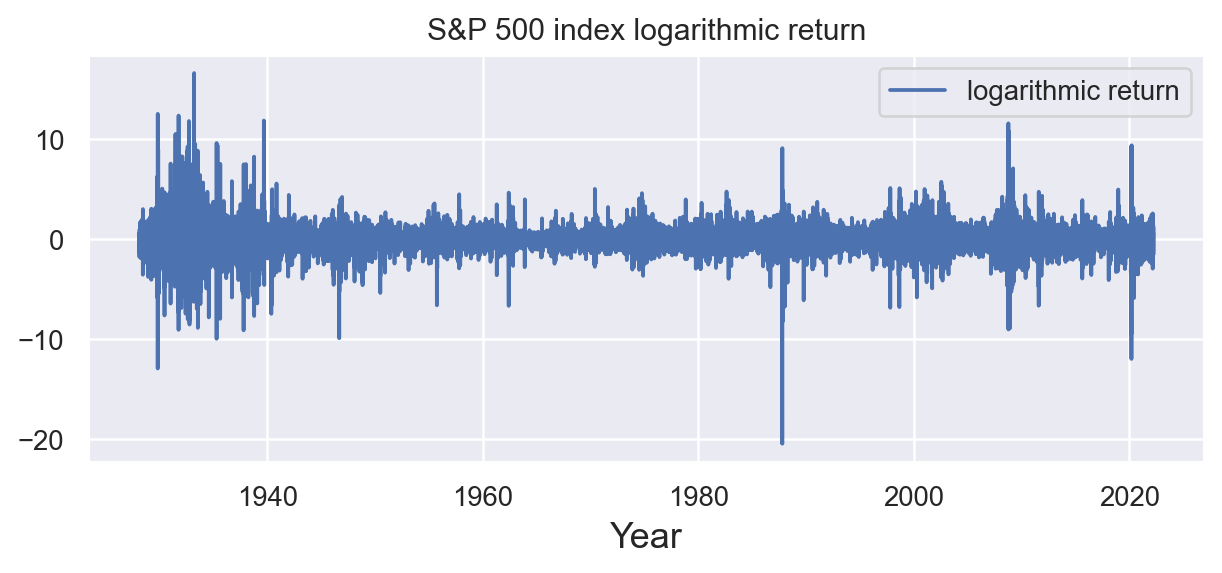

In [36]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,3),dpi=180)
plt.plot(df['return'],label='logarithmic return')
plt.xlabel('Year',{'fontsize':'large'})
plt.title('S&P 500 index logarithmic return')
plt.legend()
plt.show()

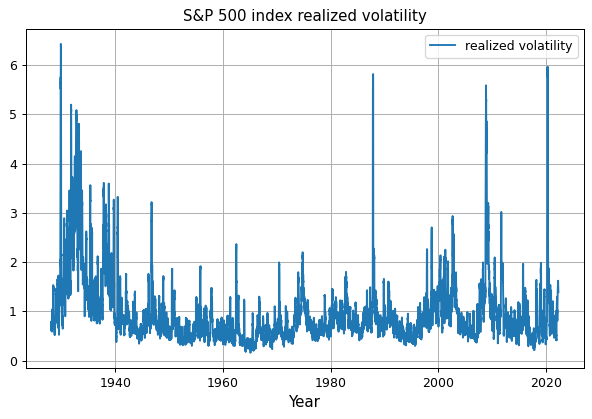

In [5]:
plt.figure(figsize=(8,5), dpi=90)
plt.grid()
plt.plot(df['realized volatility'],label='realized volatility')
plt.xlabel('Year',{'fontsize':'large'})
plt.title('S&P 500 index realized volatility')
plt.legend()

/Users/shinachuan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


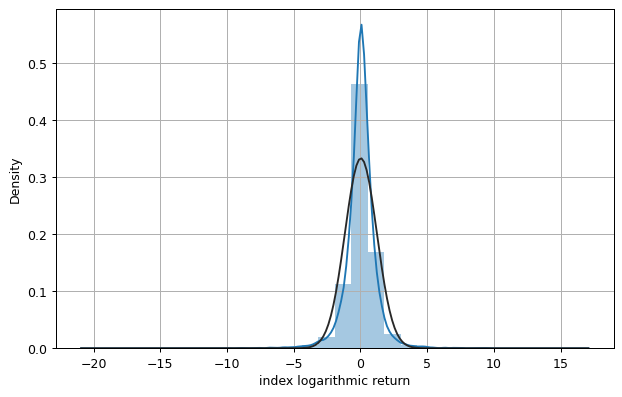

In [6]:
plt.figure(figsize=(8,5), dpi=90)
sns.distplot(df['return'], norm_hist=True, fit=stats.norm, 
             bins=30)
plt.xlabel('index logarithmic return')
plt.grid()
plt.show()

In [7]:
# x_dim: the dimension of the input X
# time_steps: predict of n days
# if x_dim = 22, time steps = 1, it means we use X1 = [p1,p2,...,p22] to predict p23(y1)

def create_dataset(x, y, x_dim, time_steps):
    dataX, dataY = [], []
    for i in range(len(x) - x_dim - time_steps+1):
        dataX.append(x[i:(i + x_dim), 0])
        dataY.append(y[i + x_dim + time_steps-1, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
vol=np.array(df['realized volatility']).reshape(-1,1)
vol_scaler = MinMaxScaler(feature_range=(0,1))
vol=vol_scaler.fit_transform(vol)

ret=np.array(df['return']).reshape(-1,1)
ret_scaler = MinMaxScaler(feature_range=(0,1))
ret=ret_scaler.fit_transform(ret)

vol.shape, ret.shape

((23656, 1), (23656, 1))

In [9]:
ratio = 0.8
Traindata_x = ret[0:round(len(ret)*ratio)]
Traindata_y = vol[0:round(len(vol)*ratio)]

Testdata_x = ret[round(len(ret)*ratio):]
Testdata_y = vol[round(len(vol)*ratio):]

Traindata_x.shape, Testdata_x.shape, Traindata_x.shape, Traindata_y.shape

((18925, 1), (4731, 1), (18925, 1), (18925, 1))

In [10]:
from sklearn.model_selection import train_test_split
time_steps = 1
x_dim = 22
X, y = create_dataset(Traindata_x, Traindata_y, x_dim, time_steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
print('Data size: {} Train size: {} Test size: {}'.format(X.shape[0], X_train.shape[0], X_test.shape[0]))

Data size: 18903 Train size: 17012 Test size: 1891


In [11]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_train.shape[1],1))
print('------------------------------------------------------')
print('X_train shape: {}'.format(X_train.shape))
print('------------------------------------------------------')
print('X_test shape: {}'.format(X_test.shape))

------------------------------------------------------
X_train shape: (17012, 22, 1)
------------------------------------------------------
X_test shape: (1891, 22, 1)


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [13]:
model = Sequential()
model.add(LSTM(16, input_shape=(x_dim, 1), return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae', 'mape','msle'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=2/9)
score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)

Epoch 1/500
207/207 [==============================] - 2s 4ms/step - loss: 0.0121 - mae: 0.0727 - mape: 10768.5088 - msle: 0.0077 - val_loss: 0.0114 - val_mae: 0.0698 - val_mape: 79.5193 - val_msle: 0.0073
Epoch 2/500
207/207 [==============================] - 1s 3ms/step - loss: 0.0121 - mae: 0.0722 - mape: 9994.9844 - msle: 0.0077 - val_loss: 0.0114 - val_mae: 0.0736 - val_mape: 88.9352 - val_msle: 0.0074
Epoch 3/500
207/207 [==============================] - 1s 3ms/step - loss: 0.0120 - mae: 0.0724 - mape: 10397.6299 - msle: 0.0076 - val_loss: 0.0114 - val_mae: 0.0749 - val_mape: 92.1226 - val_msle: 0.0075
Epoch 4/500
207/207 [==============================] - 1s 3ms/step - loss: 0.0120 - mae: 0.0724 - mape: 9481.2393 - msle: 0.0076 - val_loss: 0.0114 - val_mae: 0.0692 - val_mape: 77.7081 - val_msle: 0.0073
Epoch 5/500
207/207 [==============================] - 1s 3ms/step - loss: 0.0120 - mae: 0.0721 - mape: 9700.4775 - msle: 0.0076 - val_loss: 0.0114 - val_mae: 0.0736 - val_mape: 

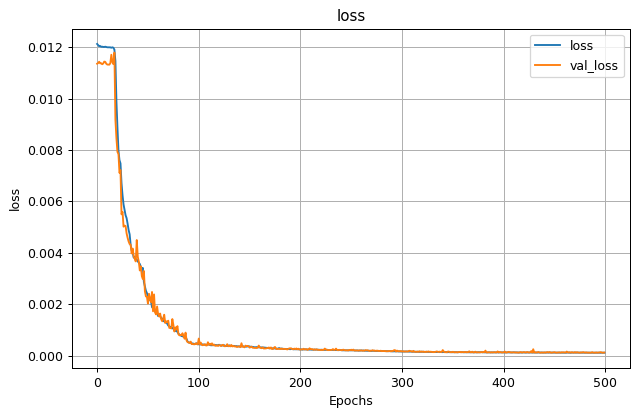

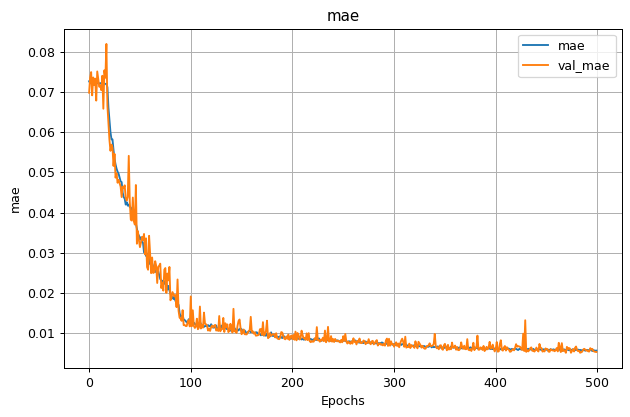

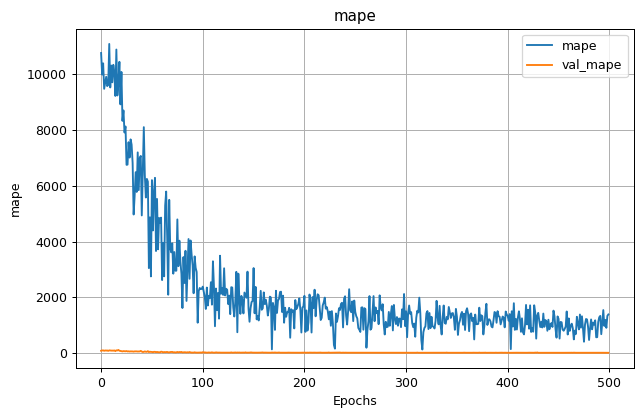

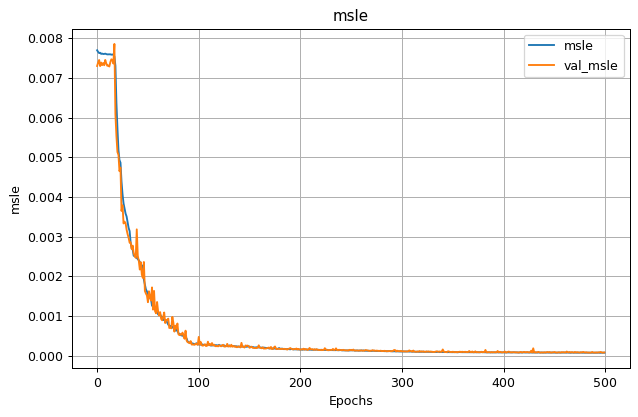

In [54]:
def visualize_loss(history, evaluation):
    train = history.history[evaluation]
    val = history.history['val_'+evaluation]
    epochs = range(len(train))
    plt.figure(figsize=(8,5),dpi=90)
    plt.plot(epochs, train, label=evaluation)
    plt.plot(epochs, val, label='val_'+evaluation)
    plt.title(evaluation)
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel(evaluation)
    plt.legend()
    plt.show()

for eva in ['loss','mae', 'mape','msle']:
    visualize_loss(history, eva)

In [55]:
Test_X, Test_y = create_dataset(Testdata_x, Testdata_y, x_dim, time_steps)
Train_X, Train_y = create_dataset(Traindata_x, Traindata_y, x_dim, time_steps)

In [56]:
Test_y_pre = model.predict(Test_X.reshape(Test_X.shape[0], Test_X.shape[1], 1))
Test_y_pre = vol_scaler.inverse_transform(Test_y_pre)
Test_y = vol_scaler.inverse_transform(Test_y.reshape(-1,1))

Train_y_pre = model.predict(Train_X.reshape(Train_X.shape[0], Train_X.shape[1], 1))
Train_y_pre = vol_scaler.inverse_transform(Train_y_pre)
Train_y = vol_scaler.inverse_transform(Train_y.reshape(-1,1))

In [57]:
index_train = df.index[x_dim+time_steps-1:round(len(vol)*ratio)]
index_test = df.index[round(len(vol)*ratio)+x_dim+time_steps-1:]

Test_y = pd.Series(Test_y.reshape(-1,), index=index_test)
Test_y_pre = pd.Series(Test_y_pre.reshape(-1,), index=index_test)
Train_y = pd.Series(Train_y.reshape(-1,), index=index_train)
Train_y_pre = pd.Series(Train_y_pre.reshape(-1,), index=index_train)

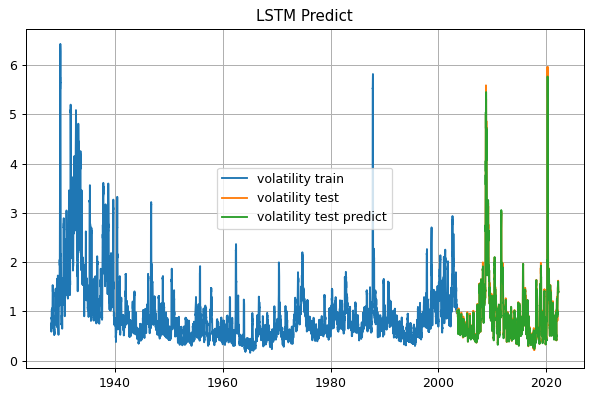

In [59]:
plt.figure(figsize=(8,5),dpi=90)

plt.grid()
plt.plot(Train_y,label='volatility train')
plt.plot(Test_y, label='volatility test')
plt.plot(Test_y_pre,label='volatility test predict')
plt.title('LSTM Predict')
plt.legend()

In [60]:
from sklearn import metrics
mse = metrics.mean_squared_error(Test_y, Test_y_pre)
mae = metrics.mean_absolute_error(Test_y, Test_y_pre)
r2 = metrics.r2_score(Test_y, Test_y_pre)
print('r2: {:.4f}%'.format(r2*100))
print('mean squared error: {:.4f}%'.format(mse*100))
print('mean absolute error: {:.4f}%'.format(mae*100))

r2: 99.1881%
mean squared error: 0.4076%
mean absolute error: 3.4105%
